In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick

from cycler import cycler
import sys, os, glob
import pytz

from scipy.signal import *
from scipy.stats import *

# use latex fonts/mathematica color scheme
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family='Computer Modern Roman')

# cyclers for colors and line styles
line_cycle = cycler('linestyle', ["-","-.","--"])

#color_cycle_trimmed = cycler('color', ["#62ad64", "#9750a1", "#b8893a", "#6778d0", "#b8475f"])
color_cycle = cycler('color', ["#62ad64", "#9750a1", "#b8893a", "#6778d0", "#b8475f"])
clrs = ["#62ad64", "#9750a1", "#b8893a", "#6778d0", "#b8475f"]
clrs2 = ["#e18e9c", "#53c0da", "#c0af6f", "#b5a0dd", "#71c19b"]

In [3]:
# Import external RF data
i = 0
output = {}
for i in range(39):
    if i+1<10:
        f_name = 'unit0'+str(i+1)+'_0dbm.DAT'
        unit_tag = '0'+str(i+1)
    else:
        f_name = 'unit'+str(i+1)+'_0dbm.DAT'
        unit_tag = str(i+1)
    # All frequency ranges are the same
    freq, output[unit_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                 skip_header = 29, unpack = True)

In [4]:
# Import VCO data
i = 0
vco = {}
for i in range(39):
    if i+1<10:
        f_name = 'unit0'+str(i+1)+'_vco.DAT'
        unit_tag = '0'+str(i+1)
    else:
        f_name = 'unit'+str(i+1)+'_vco.DAT'
        unit_tag = str(i+1)
    # All frequency ranges are the same
    try:
        freq_vco, vco[unit_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        vco[unit_tag]+=30
    except (OSError, IOError):
        continue

In [8]:
# Import Harmonic Data
i = 0
Harm = {}
for i in range(3):
    f_name = 'unit29_'+str(i*5)+'dbm.DAT'
    p_tag = '1,'+str(i*5)
    try:
        freq_1st, Harm[p_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        Harm[p_tag]+=i*5
    except (OSError, IOError):
        continue
for i in range(3):
    f_name = 'unit29_'+str(i*5)+'dbm_2ndH.DAT'
    p_tag = '2,'+str(i*5)
    try:
        freq_2nd, Harm[p_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        Harm[p_tag]+=i*5
    except (OSError, IOError):
        continue
for i in range(3):
    f_name = 'unit29_'+str(i*5)+'dbm_3rdH.DAT'
    p_tag = '3,'+str(i*5)
    try:
        freq_3rd, Harm[p_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        Harm[p_tag]+=i*5
    except (OSError, IOError):
        continue

In [9]:
output_2d = np.array([output[tag] for tag in output.keys()])
freq_2d = np.array([freq for tag in output.keys()])

In [6]:
WattLine = np.array([30 for i in range(len(freq))])

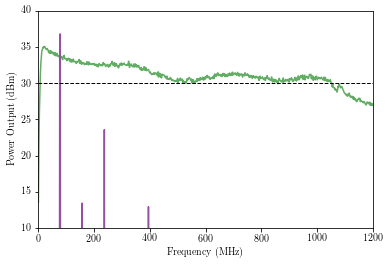

In [65]:
matplotlib.rc('axes', prop_cycle=color_cycle)
tag = '05'
plt.figure(1)
plt.plot(freq/10**6, output[tag], '-')
if tag in vco.keys():
    plt.plot(freq_vco/10**6, vco[tag], '-')
plt.plot(freq/10**6, WattLine, 'k--', linewidth = 1.0)
plt.ylim(10,40)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power Output (dBm)')
plt.xlim(0.0,1200)
plt.show()

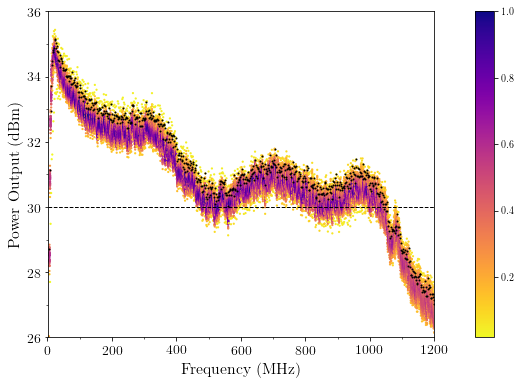

In [18]:
colorMap = []
i = 0
for i in range(int(output_2d.shape[1])):
    gs = gaussian_kde(output_2d[:, i])
    colorMap.extend(gs(output_2d[:, i]))
c = colorMap/np.max(colorMap)
cnorm = matplotlib.colors.Normalize(vmin=np.min(c), vmax = np.max(c))

fig = plt.figure()
fig.set_size_inches((8,6))

gs = gridspec.GridSpec(1, 2, width_ratios=[20, 1])
ax = fig.add_subplot(gs[0,0])
color_ax = plt.subplot(gs[0,1])

sc = ax.scatter(freq_2d.flatten(order='F')/10**6, output_2d.flatten(order='F'), \
                c=c, s=5, edgecolors='', cmap='plasma_r', norm=cnorm)
ax.plot(freq/(10**6), WattLine, 'k--', linewidth = 1.0)
ax.scatter(freq/10**6, output['29'], color = 'black', s = 1)
ax.set_ylim(26,36)
ax.set_xlim(1,1200)
ax.set_xlabel('Frequency (MHz)', fontsize = 16)
ax.set_ylabel('Power Output (dBm)', fontsize = 16)
ax.tick_params(labelsize = 14)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
fig.colorbar(sc, cax=color_ax)
plt.show()

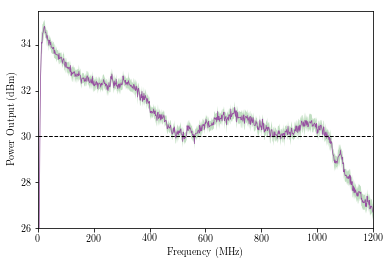

In [26]:
pwr_avg = np.mean(output_2d, axis = 0)
pwr_std = np.std(output_2d, axis = 0)
fig, ax = plt.subplots(1,1)
#plt.plot(freq/(10**6), pwr_avg+pwr_std, 'g-')
#plt.plot(freq/(10**6), pwr_avg-pwr_std, 'g-')
ax.fill_between(freq/(10**6), pwr_avg+pwr_std, pwr_avg-pwr_std, alpha = 0.4)
plt.plot(freq/(10**6), pwr_avg, color = clrs[1], linestyle = '-', linewidth = 0.75)
plt.plot(freq/(10**6), WattLine, 'k--', linewidth = 1.0)
plt.ylim(26,35.5)
plt.xlim(1,1200)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power Output (dBm)')
plt.show()

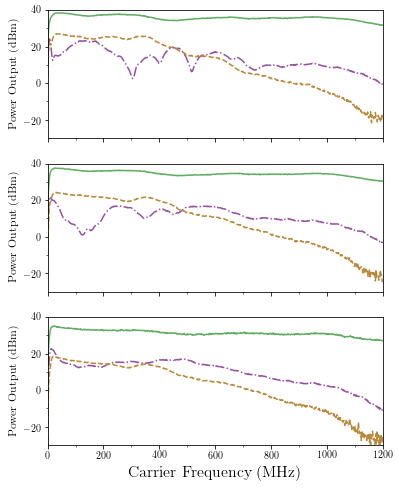

In [14]:
fig = plt.figure()
fig.set_size_inches((6,8))
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1,1])

ax = []
i = 0
for i in range(3):
    if i == 0:
        ax.append(fig.add_subplot(gs[2-i,0]))
    else:
        ax.append(fig.add_subplot(gs[2-i,0], sharex = ax[0]))
        plt.setp(ax[i].get_xticklabels(), visible=False)
    ax[i].plot(freq_1st/(10**6), Harm['1,'+str(i*5)], color = clrs[0], linestyle = '-')
    ax[i].plot(freq_1st/(10**6), Harm['2,'+str(i*5)], color = clrs[1], linestyle = '-.')
    ax[i].plot(freq_1st/(10**6), Harm['3,'+str(i*5)], color = clrs[2], linestyle = '--')
    ax[i].set_ylabel('Power Output (dBm)', fontsize = 12)
    ax[i].xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    ax[i].yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    ax[i].set_xlim(1,1200)
    ax[i].set_ylim(-30,40)
#plt.plot(freq_1st/(10**6), WattLine, 'k--')
ax[0].set_xlabel('Carrier Frequency (MHz)', fontsize = 16)
plt.show()

In [9]:
def vrms(t, v, freq):
    v_sq = np.power(v, 2)
    bin_size = int(np.ceil((freq*abs(t[1]-t[0]))**(-1)))
    kernel = np.ones(bin_size)/bin_size
    return np.sqrt(np.convolve(v_sq, kernel, 'valid')), t[bin_size-1::1]
def power(t, v, freq):
    v_temp, t_ax = vrms(t, v, freq)
    return (10*np.log((np.power(v_temp, 2)/50)/10**(-3))+30), t_ax
def vrms_rev(t, v, freq):
    v_sq = np.power(v, 2)[::-1]
    bin_size = int(np.ceil((freq*abs(t[1]-t[0]))**(-1)))
    kernel = np.ones(bin_size)/bin_size
    t_tmp = t[::-1]
    return np.sqrt(np.convolve(v_sq, kernel, 'valid')), t_tmp[bin_size-1::1]
def power_rev(t, v, freq):
    v_temp, t_ax = vrms_rev(t, v, freq)
    return (10*np.log((np.power(v_temp, 2)/50)/10**(-3))+30), t_ax

In [12]:
def add_envelope(df, freq):
    analytic_signal = hilbert(df['v_raw_'+freq])
    df['a_envl_'+freq] = -np.abs(-analytic_signal)

In [13]:
df = pd.DataFrame()
list_ = []
for freq in ['50MHz', '100MHz', '500MHz', '1GHz']:
    for trace in ['raw', 'trig', 'envl']:
        f_name = 'Switch_'+freq+'_'+trace+'.csv'
        df_temp = pd.read_csv(f_name, header=None, usecols=[3,4], names=['t_'+trace+'_'+freq, 'v_'+trace+'_'+freq])
        list_.append(df_temp)
df = pd.concat(list_, axis=1)

In [14]:
add_envelope(df, '50MHz')
add_envelope(df, '100MHz')
add_envelope(df, '500MHz')
add_envelope(df, '1GHz')

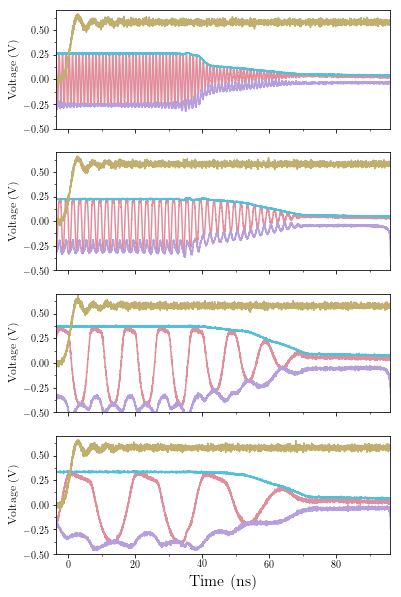

In [15]:
fig = plt.figure()
fig.set_size_inches((6,10))
gs = gridspec.GridSpec(4, 1, height_ratios=[1,1,1,1])

ax = []
freqs = ['50MHz', '100MHz', '500MHz', '1GHz']
i = 0
for i in range(4):
    if i == 0:
        ax.append(fig.add_subplot(gs[3-i,0]))
    else:
        ax.append(fig.add_subplot(gs[3-i,0], sharex = ax[0]))
        plt.setp(ax[i].get_xticklabels(), visible=False)
    for index, trace in enumerate(['raw','envl','trig',]):
        ax[i].plot(df['t_'+trace+'_'+freqs[i]][::5]*10**9, df['v_'+trace+'_'+freqs[i]][::5], color = clrs2[index], linestyle = '-')
    ax[i].plot(df['t_raw_'+freqs[i]][::5]*10**9, df['a_envl_'+freqs[i]][::5], color = clrs2[3], linestyle = '-')
    ax[i].set_ylabel('Voltage (V)', fontsize = 12)
    ax[i].xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    ax[i].yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    ax[i].set_ylim(-0.5, 0.7)
#ax = fig.add_subplot(gs[0,0])
#twinax = ax.twinx()
ax[0].set_xlim(-3.75, 96.2)
ax[0].set_xlabel('Time (ns)', fontsize = 16)
plt.show()